In [1]:
! pip install simple_image_download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from simple_image_download import simple_image_download as simp 
response = simp.simple_image_download

lst=['Deepika_Padukone', 'Anushka_Sharma', 'Katrina_Kaif','Kriti_Sanon','Alia_Bhatt']

for rep in lst:
    response().download(rep +'_face' , 500)

HTTPSConnectionPool(host='i.pinimg.com', port=443): Max retries exceeded with url: /736x/b0/a5/f8/b0a5f85c084f438dbbe70b07b88f204b.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7ff66c388510>: Failed to establish a new connection: [Errno 110] Connection timed out'))


In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('/content/simple_images/Alia_Bhatt_face/Alia_Bhatt_face_4.jpg')
img.shape

(674, 1199, 3)

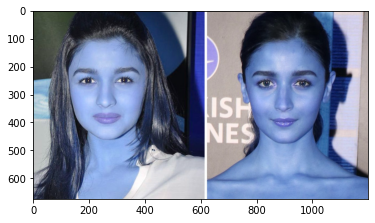

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(674, 1199)

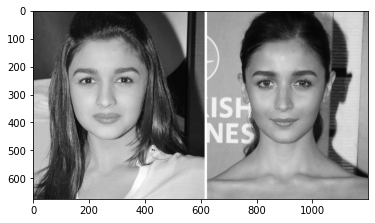

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
!wget https://raw.githubusercontent.com/NirmalaBabu21/Haar-Cascade-Classifier/main/opencv/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/NirmalaBabu21/Haar-Cascade-Classifier/main/opencv/haarcascades/haarcascade_eye.xml

--2022-10-26 07:38:44--  https://raw.githubusercontent.com/NirmalaBabu21/Haar-Cascade-Classifier/main/opencv/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2022-10-26 07:38:44 (19.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-10-26 07:38:44--  https://raw.githubusercontent.com/NirmalaBabu21/Haar-Cascade-Classifier/main/opencv/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.

In [9]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 86, 116, 352, 352],
       [724, 121, 357, 357]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(86, 116, 352, 352)

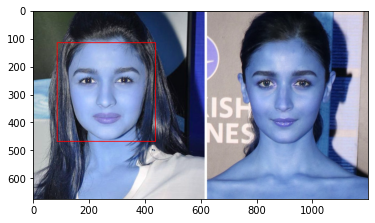

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

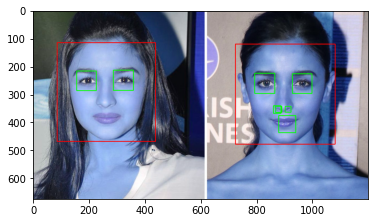

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

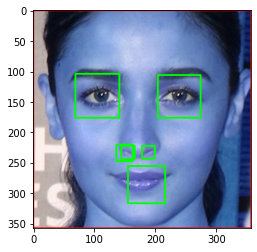

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
cropped_img = np.array(roi_color)
cropped_img.shape


(357, 357, 3)

In [15]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

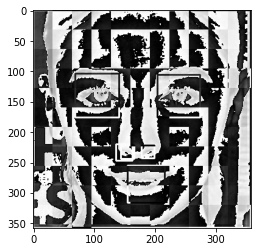

In [16]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(gray, 1.3, 5)
      for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [18]:
path_to_data = "./simple_images/"
path_to_cr_data = "./simple_images/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./simple_images/Alia_Bhatt_face',
 './simple_images/Katrina_Kaif_face',
 './simple_images/Kriti_Sanon_face',
 './simple_images/Deepika_Padukone_face',
 './simple_images/Anushka_Sharma_face']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

Alia_Bhatt_face
Generating cropped images in folder:  ./simple_images/cropped/Alia_Bhatt_face
Katrina_Kaif_face
Generating cropped images in folder:  ./simple_images/cropped/Katrina_Kaif_face
Kriti_Sanon_face
Generating cropped images in folder:  ./simple_images/cropped/Kriti_Sanon_face
Deepika_Padukone_face
Generating cropped images in folder:  ./simple_images/cropped/Deepika_Padukone_face
Anushka_Sharma_face
Generating cropped images in folder:  ./simple_images/cropped/Anushka_Sharma_face


In [23]:
cropped_img = np.array(roi_color)
cropped_img.shape

(159, 159, 3)

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [25]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Alia_Bhatt_face': ['./simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face200.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face118.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face283.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face142.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face120.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face46.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face220.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face306.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face245.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face33.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face258.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face61.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face136.png',
  './simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face2.png',
  './simple_images/cropped/Alia_Bh

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Alia_Bhatt_face': 0,
 'Katrina_Kaif_face': 1,
 'Kriti_Sanon_face': 2,
 'Deepika_Padukone_face': 3,
 'Anushka_Sharma_face': 4}

In [27]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1370, 4096)

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

1.0

In [31]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        79

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            
            'logisticregression__C': [1,5,10]
        }
    }
}

In [34]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.995141,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.993190,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.994165,{'logisticregression__C': 1}


In [35]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [36]:
best_estimators['svm'].score(X_test,y_test)

1.0

In [37]:
best_estimators['random_forest'].score(X_test,y_test)

1.0

In [38]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [39]:
best_clf = best_estimators['svm']

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[83,  0,  0,  0,  0],
       [ 0, 86,  0,  0,  0],
       [ 0,  0, 64,  0,  0],
       [ 0,  0,  0, 31,  0],
       [ 0,  0,  0,  0, 79]])

Text(69.0, 0.5, 'Truth')

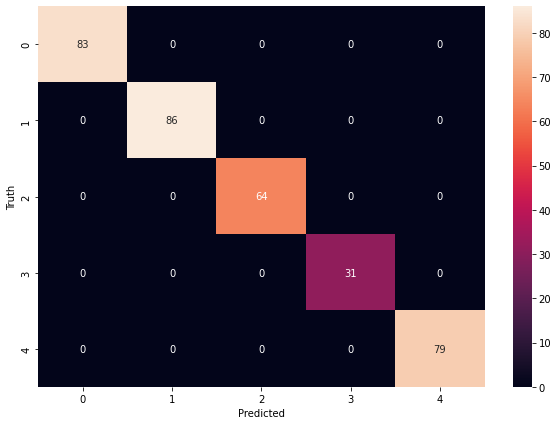

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
class_dict

{'Alia_Bhatt_face': 0,
 'Katrina_Kaif_face': 1,
 'Kriti_Sanon_face': 2,
 'Deepika_Padukone_face': 3,
 'Anushka_Sharma_face': 4}

In [43]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['saved_model.pkl']

In [44]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [45]:
!zip -r simple_images.zip simple_images

  adding: simple_images/ (stored 0%)
  adding: simple_images/cropped/ (stored 0%)
  adding: simple_images/cropped/Alia_Bhatt_face/ (stored 0%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face200.png (deflated 9%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face118.png (deflated 5%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face283.png (deflated 10%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face142.png (deflated 3%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face120.png (deflated 2%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face46.png (deflated 1%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face220.png (deflated 2%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face306.png (deflated 2%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face245.png (deflated 3%)
  adding: simple_images/cropped/Alia_Bhatt_face/Alia_Bhatt_face33.png (deflated 3%)
  adding